In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ramen-ratings.csv')

In [4]:
df.shape

(2580, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [6]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [7]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [8]:
df.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

we can drop column 'Top Ten' as majority of the are just missing values.

In [9]:
df.drop(['Top Ten'],axis=1,inplace=True)

In [10]:
df.describe(include=[np.object]).T

<ipython-input-10-8b4509b3963c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).T


,count,unique,top,freq
Brand,2580,355,Nissin,381
Variety,2580,2413,Beef,7
Style,2578,7,Pack,1531
Country,2580,38,Japan,352
Stars,2580,51,4,384


In [11]:
#finding non-numeric numbers
nonNumeric = df.index[df['Stars'] == 'Unrated'].tolist()
nonNumeric

[32, 122, 993]

In [12]:
df_a = pd.to_numeric(df['Stars'], errors='coerce')

In [13]:
mean = round(df_a.mean(),1)
mean

3.7

In [14]:
for i in nonNumeric:
  df.at[i,'Stars']=mean

In [15]:
df['Stars']=df['Stars'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 121.1+ KB


# Counts - Categorical




In [17]:
df.groupby('Style')['Review #'].count().sort_values(ascending=False)

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Review #, dtype: int64

In [18]:
df.groupby('Brand')['Review #'].count().sort_values(ascending=False)

Brand
Nissin             381
Nongshim            98
Maruchan            76
Mama                71
Paldo               66
                  ... 
Liang Cheng Mai      1
Lipton               1
Samurai Ramen        1
Lishan               1
1 To 3 Noodles       1
Name: Review #, Length: 355, dtype: int64

Top Brand is Nissin

In [19]:
df.groupby('Variety')['Review #'].count().sort_values(ascending=False).head(10)

Variety
Beef                             7
Chicken                          7
Artificial Chicken               6
Vegetable                        6
Yakisoba                         6
Miso Ramen                       5
Spicy Beef                       4
Curry Flavour Instant Noodles    4
Curry Udon                       4
Artificial Spicy Beef            4
Name: Review #, dtype: int64

In [20]:
df.groupby('Country')['Review #'].count().sort_values(ascending=False).head(10)

Country
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Name: Review #, dtype: int64

Top Countries are Japan, USA and South Korea

In [21]:
df_USA = df[df['Country']=='USA']

df_USA.groupby(['Country','Brand'])['Country'].count().sort_values(ascending=False).head(10)

Country  Brand          
USA      Nissin             95
         Maruchan           51
         Nongshim           35
         Annie Chun's       12
         Yamachan           11
         Sapporo Ichiban    10
         Thai Kitchen       10
         Koyo                7
         Sun Noodle          7
         Myojo               6
Name: Country, dtype: int64

In [22]:
df_JP = df[df['Country']=='Japan']

df_JP.groupby(['Country','Brand'])['Country'].count().sort_values(ascending=False).head(10)

Country  Brand          
Japan    Nissin             111
         Myojo               41
         Maruchan            23
         Acecook             14
         Takamori Kosan      14
         Sapporo Ichiban     14
         Sakurai Foods       10
         New Touch            9
         Menraku              8
         Fujiwara             7
Name: Country, dtype: int64

In [23]:
df_SK = df[df['Country']=='South Korea']

df_SK.groupby(['Country','Brand'])['Country'].count().sort_values(ascending=False).head(10)

Country      Brand         
South Korea  Paldo             65
             Nongshim          57
             Samyang Foods     50
             Ottogi            42
             Samyang           19
             Pulmuone           8
             Emart              7
             Six Fortune        6
             Rhee Bros Assi     6
             Wang               6
Name: Country, dtype: int64

In [24]:
df.groupby('Brand').Stars.mean()

Brand
1 To 3 Noodles      4.000000
7 Select            3.750000
7 Select/Nissin     3.500000
A-One               2.750000
A-Sha Dry Noodle    4.067308
                      ...   
Yum Yum             3.750000
Yum-Mie             3.500000
Zow Zow             3.750000
iMee                3.500000
iNoodle             3.000000
Name: Stars, Length: 355, dtype: float64

Highest Rating Brand is '1 to 3 noodles'

In [25]:
df[df['Brand']=='A-Sha Dry Noodle'].count()

Review #    26
Brand       26
Variety     26
Style       26
Country     26
Stars       26
dtype: int64

In [26]:
import matplotlib.pyplot as plt

In [27]:
df_brand = df.groupby('Brand')['Review #'].count().to_frame()
df_brand.sort_values(by = 'Brand',ascending=False)

,Review #
Brand,
iNoodle,2
iMee,4
Zow Zow,1
Yum-Mie,1
Yum Yum,12
...,...
A-Sha Dry Noodle,26
A-One,4
7 Select/Nissin,1


<BarContainer object of 2580 artists>

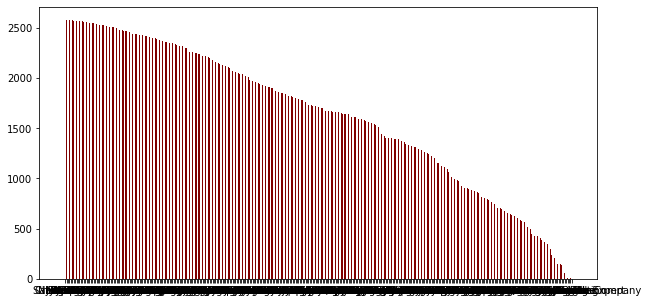

In [28]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['Brand'],df['Review #'], color ='maroon',width = 0.4)

In [30]:
Top_10 = df['Brand'].value_counts().sort_values(ascending=False)[:10]
Top_10

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Vina Acecook      34
Name: Brand, dtype: int64

In [33]:
top10=Top_10.to_frame()

In [35]:
top10

,Brand
Nissin,381
Nongshim,98
Maruchan,76
Mama,71
Paldo,66
Myojo,63
Indomie,53
Samyang Foods,52
Ottogi,46
Vina Acecook,34


In [38]:
top10.reset_index(inplace=True)


In [41]:
top10.rename(columns={'index':'Brand','Brand':'Count'},inplace=True)
top10

,Brand,Count
0,Nissin,381
1,Nongshim,98
2,Maruchan,76
3,Mama,71
4,Paldo,66
5,Myojo,63
6,Indomie,53
7,Samyang Foods,52
8,Ottogi,46
9,Vina Acecook,34


<BarContainer object of 10 artists>

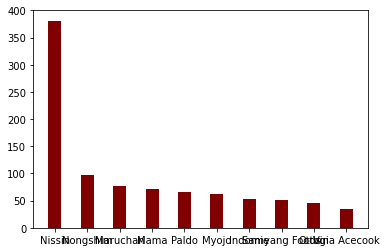

In [42]:
plt.bar(top10['Brand'],top10['Count'], color ='maroon',width = 0.4)